In [1]:
import gym
from MarkovDecisionProcess import MarkovDecisionProcess as MDP
from Agent import Agent
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')
env = gym.make('FrozenLake-v0')
env.reset()
mdp = MDP(env.observation_space.n, env.action_space.n, env.unwrapped.P)

In [2]:
def run_experiment(env, agent, num_runs=1, render=False):
    tot_reward = [0]
    for _ in range(num_runs):
        observation = 0
        done = False
        env.reset()
        render and env.render()
        reward_per_run = 0
        while not done:
            action = agent.get_action(observation)
            observation, reward, done, info = env.step(action)
            reward_per_run += reward
            render and env.render()
        env.close()
        tot_reward.append(reward_per_run + tot_reward[-1])
    return tot_reward

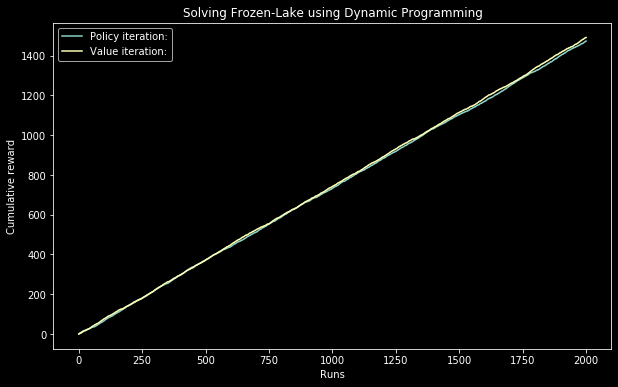

In [3]:
agent1 = Agent(mdp, 1, 0.000001)
agent1.policy_iteration()

agent2 = Agent(mdp, 1, 0.000001)
agent2.value_iteration()

num_runs = 2000
cumulative_rewards1 = run_experiment(env, agent1, num_runs)
cumulative_rewards2 = run_experiment(env, agent2, num_runs)

fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and an axes.
ax.plot(range(num_runs+1), cumulative_rewards1, label="Policy iteration:")
ax.plot(range(num_runs+1), cumulative_rewards2, label="Value iteration:")
ax.grid(False)
ax.set_xlabel('Runs')  # Add an x-label to the axes.
ax.set_ylabel('Cumulative reward')  # Add a y-label to the axes.
ax.set_title("Solving Frozen-Lake using Dynamic Programming")  # Add a title to the axes.
ax.legend()  # Add a legend.


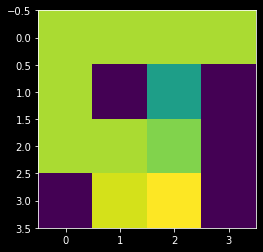

In [4]:
X1 = np.reshape(agent2.value_fn, (4,4))
fig, ax = plt.subplots()
ax.imshow(X1, interpolation="nearest")
plt.show()

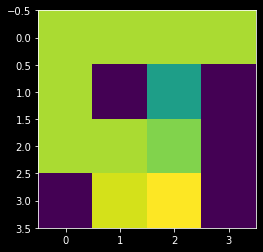

In [5]:
X2 = np.reshape(agent2.value_fn, (4,4))
fig, ax = plt.subplots()
ax.imshow(X2, interpolation="nearest")
plt.show()

In [6]:
print(agent1.value_fn)
print(agent2.value_fn)

[0.8235121762247759, 0.8235065214576502, 0.8235025913342998, 0.8235005915833544, 0.8235139099631912, 0.0, 0.5294000122308313, 0.0, 0.82351662512892, 0.823520106733779, 0.7646977282531586, 0.0, 0.0, 0.8823464740809556, 0.9411731799586069, 0.0]
[0.8235122789674345, 0.8235066579092396, 0.8235027512139779, 0.82350076338387, 0.8235140023708973, 0.0, 0.52940008228867, 0.0, 0.8235167013513003, 0.8235201622020147, 0.7646977768606238, 0.0, 0.0, 0.8823465126319712, 0.9411731995743859, 0.0]


In [7]:
import timeit
policy_iteration_setup = '''
import gym
from MarkovDecisionProcess import MarkovDecisionProcess as MDP
from Agent import Agent
env = gym.make('FrozenLake-v0')
env.reset()
mdp = MDP(env.observation_space.n, env.action_space.n, env.unwrapped.P)
agent = Agent(mdp, 1, 0.000001)
'''
policy_iteration_code = "agent.policy_iteration()"
value_iteration_setup = '''
import gym
from MarkovDecisionProcess import MarkovDecisionProcess as MDP
from Agent import Agent
env = gym.make('FrozenLake-v0')
env.reset()
mdp = MDP(env.observation_space.n, env.action_space.n, env.unwrapped.P)
agent = Agent(mdp, 1, 0.000001)
'''
value_iteration_code = "agent.value_iteration()"


In [8]:
num_runs_options = [1, 10, 50, 100, 500, 1000]
pi_time = []
vi_time = []
for num_runs in num_runs_options:
    pi_time.append(timeit.timeit(setup=policy_iteration_setup, stmt=policy_iteration_code, number=num_runs))
    vi_time.append(timeit.timeit(setup=value_iteration_setup, stmt=value_iteration_code, number=num_runs))

In [9]:
print(pi_time, vi_time)

[0.5462585000000004, 0.42300019999999705, 0.8957598000000004, 0.973786699999998, 1.5891765000000007, 2.4586337] [0.04867550000000165, 0.04073110000000213, 0.17944450000000245, 0.22976260000000082, 0.6514621000000034, 0.9190033]


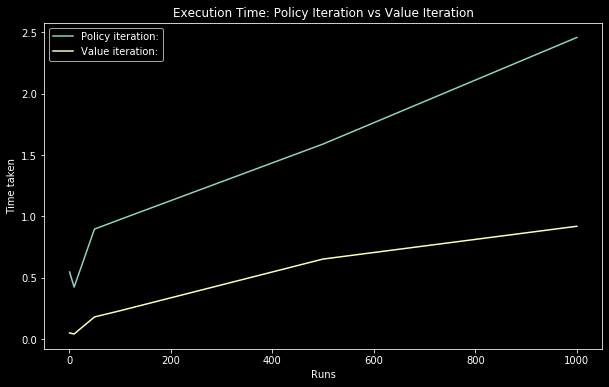

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and an axes.
ax.plot(num_runs_options, pi_time, label="Policy iteration:")
ax.plot(num_runs_options, vi_time, label="Value iteration:")
ax.grid(False)
ax.set_xlabel('Runs')  # Add an x-label to the axes.
ax.set_ylabel('Time taken')  # Add a y-label to the axes.
ax.set_title("Execution Time: Policy Iteration vs Value Iteration")  # Add a title to the axes.
ax.legend()  # Add a legend.


In [ ]:
import gym
from MarkovDecisionProcess import MarkovDecisionProcess as MDP
env = gym.make('FrozenLake-v0')
env.render()
mdp = MDP(env.observation_space.n, env.action_space.n, env.unwrapped.P)
print("Number of states ", mdp.num_states)
print("Number of actions ", mdp.num_actions)
sample_actions = {'LEFT':0, 'UP':3}
sample_states = [0,11,15]
for s in sample_states:
    for a in sample_actions.keys():
        print(f"Transitions for state {s} and action {a} are\n ", mdp.P[s][sample_actions[a]])